## Machine Learning

**Classify Potential And Unpotential Customers On Accepting Term Deposit Offers**

## Conclusion

**Random Forest Classifier Is The Best Model For Marketing Bank Term Deposit During Crisis**

**Random Forest Classifier Has A Good Recall, Accompanied With A Relatively Good Precision**

**This Model Might Dramaticaly Reduce The Marketing Expenses, Yet Still Highly Effective To Reach A Wide Number of Potential Customers**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank_marketing_campaign.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data Preprocessing**

Handling Missing Value

In [3]:
df.drop(columns='pdays', inplace=True)

Unecessary Columns

In [4]:
df.drop(columns='duration', inplace=True)

df.drop(columns='emp.var.rate', inplace=True)
df.drop(columns='cons.conf.idx', inplace=True)
df.drop(columns='cons.price.idx', inplace=True)

**Change Data Type**

Encoding

In [5]:
df['education'] = df['education'].map({
    'illiterate' : 0,
    'basic.4y' : 1,
    'basic.6y' : 2,
    'basic.9y' : 3,
    'unknown' : 4,
    'high.school' : 5,
    'university.degree' : 6,
    'professional.course' : 7
})
df['education'] = df['education'].astype(int)


df['contact'] = df['contact'].map({
    'telephone' : 0,
    'cellular' : 1
})
df['contact'] = df['contact'].astype(int)

df['default'] = df['default'].map({
    'no' : 0,
    'unknown' : 1,
    'yes' : 2
})
df['default'] = df['default'].astype(int)

df['housing'] = df['housing'].map({
    'no' : 0,
    'unknown' : 1,
    'yes' : 2
})
df['housing'] = df['housing'].astype(int)

df['loan'] = df['loan'].map({
    'no' : 0,
    'unknown' : 1,
    'yes' : 2
})
df['loan'] = df['loan'].astype(int)

df['poutcome'] = df['poutcome'].map({
    'failure' : 0,
    'nonexistent' : 1,
    'success' : 2
})
df['poutcome'] = df['poutcome'].astype(int)

df['y'] = df['y'].map({
    'no' : 0,
    'yes' : 1
})
df['y'] = df['y'].astype(int)

In [6]:
df = pd.get_dummies(data=df, columns=['job','marital','month','day_of_week'])

**Splitting Imbalance Data**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90, stratify = y,random_state = 42)

**Checking Imbalance Dataset**

In [9]:
df_train = pd.concat([X_train, y_train], axis=1)

In [10]:
df_train['y'].value_counts()

0    32893
1     4176
Name: y, dtype: int64

**Over Sampled**

In [11]:
from sklearn.utils import resample

In [12]:
response_no = df_train[df_train['y'] == 0]
response_yes = df_train[df_train['y'] == 1]

response_Oversample = resample(response_yes,
                           replace=True,
                           n_samples = len(response_no),
                           random_state = 42)

In [13]:
df_OverSampled = pd.concat([response_no, response_Oversample])

df_OverSampled['y'].value_counts()

1    32893
0    32893
Name: y, dtype: int64

In [14]:
df = df_OverSampled

**Machine Learning Preprocessing**

Defined Variable for Oversampled Train

In [15]:
X_train = df.drop(columns='y')
y_train = df['y']

**Scaling**

Creating Variable for Scaled Data

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaling = RobustScaler()
scaled_train = scaling.fit_transform(X_train)
scaled_test = scaling.fit_transform(X_test)

**Machine Learning**

**LogReg**

In [17]:
from sklearn.linear_model import LogisticRegression

modelLog = LogisticRegression()
modelLog.fit(X_train, y_train)
modelLog.score(X_test, y_test)
modelLog.predict(X_test)


print('Model Log Score :',modelLog.score(X_test, y_test))

Model Log Score : 0.763292061179898


**KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)
modelKNN.score(X_test, y_test)
modelKNN.predict(X_test)

print('Model KNN Score :',modelKNN.score(X_test, y_test))

Model KNN Score : 0.7615926195678563


KNN Scaled

In [19]:
modelKNN2 = KNeighborsClassifier()
modelKNN2.fit(scaled_train, y_train)
modelKNN2.score(scaled_test, y_test)
modelKNN2.predict(scaled_test)

print('Model KNN Score :',modelKNN2.score(scaled_test, y_test))

Model KNN Score : 0.7662053896576839


**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
modelRF.score(X_test, y_test)
modelRF.predict(X_test)

print('Model RF Score :',modelRF.score(X_test, y_test))

Model RF Score : 0.883709638261714


**SVC**

In [21]:
from sklearn.svm import SVC

modelSVC = SVC(max_iter = 2000, cache_size=1000)
modelSVC.fit(X_train, y_train)
modelSVC.score(X_test, y_test)
modelSVC.predict(X_test)

print('Model SVC Score :',modelSVC.score(X_test, y_test))

Model SVC Score : 0.18621024520514687


SVC Scaled

In [22]:
modelSVC2 = SVC(max_iter = 2000, cache_size=1000)
modelSVC2.fit(scaled_train, y_train)
modelSVC2.score(scaled_test, y_test)
modelSVC2.predict(scaled_test)

print('Model SVC Score :',modelSVC2.score(scaled_test, y_test))

Model SVC Score : 0.6763777615926195


**Metrics**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [24]:
y_pred_Logtr = modelLog.predict(X_train)
acc_Logtr = accuracy_score(y_train, y_pred_Logtr)
prec_Logtr = precision_score(y_train, y_pred_Logtr)
rec0_Logtr = recall_score (y_train, y_pred_Logtr, pos_label=0)
rec1_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=1)
f1_Logtr = f1_score(y_train, y_pred_Logtr)

y_pred_KNNtr = modelKNN.predict(X_train)
acc_KNNtr = accuracy_score(y_train, y_pred_KNNtr)
prec_KNNtr = precision_score(y_train, y_pred_KNNtr)
rec0_KNNtr = recall_score (y_train, y_pred_KNNtr, pos_label=0)
rec1_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=1)
f1_KNNtr = f1_score(y_train, y_pred_KNNtr)

y_pred_KNN2tr = modelKNN2.predict(scaled_train)
acc_KNN2tr = accuracy_score(y_train, y_pred_KNN2tr)
prec_KNN2tr = precision_score(y_train, y_pred_KNN2tr)
rec0_KNN2tr = recall_score (y_train, y_pred_KNN2tr, pos_label=0)
rec1_KNN2tr = recall_score(y_train, y_pred_KNN2tr, pos_label=1)
f1_KNN2tr = f1_score(y_train, y_pred_KNN2tr)

y_pred_RFtr = modelRF.predict(X_train)
acc_RFtr = accuracy_score(y_train, y_pred_RFtr)
prec_RFtr = precision_score(y_train, y_pred_RFtr)
rec0_RFtr = recall_score (y_train, y_pred_RFtr, pos_label=0)
rec1_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=1)
f1_RFtr = f1_score(y_train, y_pred_RFtr)

y_pred_SVCtr = modelSVC.predict(X_train)
acc_SVCtr = accuracy_score(y_train, y_pred_SVCtr)
prec_SVCtr = precision_score(y_train, y_pred_SVCtr)
rec0_SVCtr = recall_score (y_train, y_pred_SVCtr, pos_label=0)
rec1_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=1)
f1_SVCtr = f1_score(y_train, y_pred_SVCtr)

y_pred_SVC2tr = modelSVC2.predict(scaled_train)
acc_SVC2tr = accuracy_score(y_train, y_pred_SVC2tr)
prec_SVC2tr = precision_score(y_train, y_pred_SVC2tr)
rec0_SVC2tr = recall_score (y_train, y_pred_SVC2tr, pos_label=0)
rec1_SVC2tr = recall_score(y_train, y_pred_SVC2tr, pos_label=1)
f1_SVC2tr = f1_score(y_train, y_pred_SVC2tr)


y_pred_Logts = modelLog.predict(X_test)
acc_Logts = accuracy_score(y_test, y_pred_Logts)
prec_Logts = precision_score(y_test, y_pred_Logts)
rec0_Logts = recall_score (y_test, y_pred_Logts, pos_label=0)
rec1_Logts = recall_score(y_test, y_pred_Logts, pos_label=1)
f1_Logts = f1_score(y_test, y_pred_Logts)

y_pred_KNNts = modelKNN.predict(X_test)
acc_KNNts = accuracy_score(y_test, y_pred_KNNts)
prec_KNNts = precision_score(y_test, y_pred_KNNts)
rec0_KNNts = recall_score (y_test, y_pred_KNNts, pos_label=0)
rec1_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=1)
f1_KNNts = f1_score(y_test, y_pred_KNNts)

y_pred_KNN2ts = modelKNN2.predict(scaled_test)
acc_KNN2ts = accuracy_score(y_test, y_pred_KNN2ts)
prec_KNN2ts = precision_score(y_test, y_pred_KNN2ts)
rec0_KNN2ts = recall_score (y_test, y_pred_KNN2ts, pos_label=0)
rec1_KNN2ts = recall_score(y_test, y_pred_KNN2ts, pos_label=1)
f1_KNN2ts = f1_score(y_test, y_pred_KNN2ts)

y_pred_RFts = modelRF.predict(X_test)
acc_RFts = accuracy_score(y_test, y_pred_RFts)
prec_RFts = precision_score(y_test, y_pred_RFts)
rec0_RFts = recall_score (y_test, y_pred_RFts, pos_label=0)
rec1_RFts = recall_score(y_test, y_pred_RFts, pos_label=1)
f1_RFts = f1_score(y_test, y_pred_RFts)

y_pred_SVCts = modelSVC.predict(X_test)
acc_SVCts = accuracy_score(y_test, y_pred_SVCts)
prec_SVCts = precision_score(y_test, y_pred_SVCts)
rec0_SVCts = recall_score (y_test, y_pred_SVCts, pos_label=0)
rec1_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=1)
f1_SVCts = f1_score(y_test, y_pred_SVCts)

y_pred_SVC2ts = modelSVC2.predict(scaled_test)
acc_SVC2ts = accuracy_score(y_test, y_pred_SVC2ts)
prec_SVC2ts = precision_score(y_test, y_pred_SVC2ts)
rec0_SVC2ts = recall_score (y_test, y_pred_SVC2ts, pos_label=0)
rec1_SVC2ts = recall_score(y_test, y_pred_SVC2ts, pos_label=1)
f1_SVC2ts = f1_score(y_test, y_pred_SVC2ts)

In [25]:
data = {
    "LogReg Train" : [acc_Logtr, prec_Logtr, rec1_Logtr, f1_Logtr],
    "LogReg Test" : [acc_Logts, prec_Logts, rec1_Logts, f1_Logts],
    "KNN Train" : [acc_KNNtr, prec_KNNtr, rec1_KNNtr, f1_KNNtr],
    "KNN Test" : [acc_KNNts, prec_KNNts, rec1_KNNts, f1_KNNts],
    "KNN Train S" : [acc_KNN2tr, prec_KNN2tr, rec1_KNN2tr, f1_KNN2tr],
    "KNN Test S" : [acc_KNN2ts, prec_KNN2ts, rec1_KNN2ts, f1_KNN2ts],
    "RF Train" : [acc_RFtr, prec_RFtr, rec1_RFtr, f1_RFtr],
    "RF Test" : [acc_RFts, prec_RFts, rec1_RFts, f1_RFts],
    "SVC Train" : [acc_SVCtr, prec_SVCtr, rec1_SVCtr, f1_SVCtr],
    "SVC Test" : [acc_SVCts, prec_SVCts, rec1_SVCts, f1_SVCts],
    "SVC Train S" : [acc_SVC2tr, prec_SVC2tr, rec1_SVC2tr, f1_SVC2tr],
    "SVC Test S" : [acc_SVC2ts, prec_SVC2ts, rec1_SVC2ts, f1_SVC2ts]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,KNN Train S,KNN Test S,RF Train,RF Test,SVC Train,SVC Test,SVC Train S,SVC Test S
Accuracy,0.726614,0.763292,0.923297,0.761593,0.926337,0.766205,0.996580,0.883710,0.491001,0.186210,0.453577,0.676378
Precision,0.747313,0.281063,0.867889,0.257491,0.872718,0.255152,0.993206,0.479452,0.494959,0.113697,0.400986,0.069376
Recall,0.684766,0.706897,0.998602,0.592672,0.998267,0.560345,1.000000,0.377155,0.883653,0.915948,0.188004,0.150862
F1 Score,0.714673,0.402207,0.928668,0.359008,0.931280,0.350641,0.996591,0.422195,0.634511,0.202285,0.255987,0.095044


**Hyperparameter Tuning**

Parameter

In [26]:
Param_Log = {
    "penalty" : ["l1","l2","elasticnet","none"],
    "class_weight" : [dict, "balanced","none"],
    "max_iter" : [10,100,500]
}

Param_KNN = {
    "n_neighbors" : [155],
    "weights" : ["distance","uniform"],
    "leaf_size" : [75]
}

Param_RF = {
    "n_estimators" : [1500],
    "min_samples_split" : [155],
    "min_samples_leaf" : [70]
}

Param_SVC = {
    "max_iter" : [2000],
    "kernel" : ['poly', 'rbf', 'sigmoid'],
    "gamma" : [0.01, 100],
    "cache_size" : [2000],
}

**Hyperparameter Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression Tuning**

In [28]:
model_tuned_1 = GridSearchCV(estimator=modelLog, param_grid=Param_Log, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned recall LogReg Tuned Train : ', recall_score(y_train, y_tune_1_train))
print('Tuned recall LogReg Tuned Test : ', recall_score(y_test, y_tune_1_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   12.7s finished


Best Score : 0.7139820831086762
Tuned recall LogReg Tuned Train :  0.7141033046544858
Tuned recall LogReg Tuned Test :  0.7456896551724138


**KNN Tuning**

In [29]:
model_tuned_2 = GridSearchCV(estimator=modelKNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   13.2s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   14.6s finished


Best Score : 0.9975982972143519
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.6271551724137931


KNN Scaled Tuning

In [30]:
model_tuned_2S = GridSearchCV(estimator=modelKNN2, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_2S.fit(scaled_train, y_train)
model_tuned_2S.best_score_
model_tuned_2_1S = model_tuned_2S.best_estimator_
y_tune_2S_train = model_tuned_2_1S.predict(scaled_train)
y_tune_2S_test = model_tuned_2_1S.predict(scaled_test)

print('Best Score :',model_tuned_2S.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2S_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2S_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  2.1min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.2min finished


Best Score : 0.9973246744489379
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.665948275862069


**Random Forest Tuning**

In [31]:
model_tuned_3 = GridSearchCV(estimator=modelRF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned recall RF Tuned Train : ', recall_score(y_train, y_tune_3_train))
print('Tuned recall RF Tuned Test : ', recall_score(y_test, y_tune_3_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.8s finished


Best Score : 0.6405315765135317
Tuned recall RF Tuned Train :  0.6467941507311586
Tuned recall RF Tuned Test :  0.6379310344827587


**SVC Tuning**

In [32]:
model_tuned_4 = GridSearchCV(estimator=modelSVC, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.0min finished


Best Score : 1.0
Tuned recall SVC Tuned Train :  1.0
Tuned recall SVC Tuned Test :  1.0


SVC Scaled Tuning

In [33]:
model_tuned_4S = GridSearchCV(estimator=modelSVC2, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_4S.fit(scaled_train, y_train)
model_tuned_4S.best_score_
model_tuned_4_1S = model_tuned_4S.best_estimator_
y_tune_4S_train = model_tuned_4_1S.predict(scaled_train)
y_tune_4S_test = model_tuned_4_1S.predict(scaled_test)

print('Best Score :',model_tuned_4S.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4S_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4S_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished


Best Score : 0.9994831569986623
Tuned recall SVC Tuned Train :  1.0
Tuned recall SVC Tuned Test :  1.0


**Evaluation Metrics Tuned**

In [34]:
acc_Logtr_tuned = accuracy_score(y_train, y_tune_1_train)
prec_Logtr_tuned = precision_score(y_train, y_tune_1_train)
rec0_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=0)
rec1_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=1)
f1_Logtr_tuned = f1_score(y_train, y_tune_1_train)

acc_KNNtr_tuned = accuracy_score(y_train, y_tune_2_train)
prec_KNNtr_tuned = precision_score(y_train, y_tune_2_train)
rec0_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=0)
rec1_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=1)
f1_KNNtr_tuned = f1_score(y_train, y_tune_2_train)

acc_KNN2tr_tuned = accuracy_score(y_train, y_tune_2S_train)
prec_KNN2tr_tuned = precision_score(y_train, y_tune_2S_train)
rec0_KNN2tr_tuned = recall_score(y_train, y_tune_2S_train, pos_label=0)
rec1_KNN2tr_tuned = recall_score(y_train, y_tune_2S_train, pos_label=1)
f1_KNN2tr_tuned = f1_score(y_train, y_tune_2S_train)

acc_RFtr_tuned = accuracy_score(y_train, y_tune_3_train)
prec_RFtr_tuned = precision_score(y_train, y_tune_3_train)
rec0_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=0)
rec1_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=1)
f1_RFtr_tuned = f1_score(y_train, y_tune_3_train)

acc_SVCtr_tuned = accuracy_score(y_train, y_tune_4_train)
prec_SVCtr_tuned = precision_score(y_train, y_tune_4_train)
rec0_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=0)
rec1_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=1)
f1_SVCtr_tuned = f1_score(y_train, y_tune_4_train)

acc_SVC2tr_tuned = accuracy_score(y_train, y_tune_4S_train)
prec_SVC2tr_tuned = precision_score(y_train, y_tune_4S_train)
rec0_SVC2tr_tuned = recall_score(y_train, y_tune_4S_train, pos_label=0)
rec1_SVC2tr_tuned = recall_score(y_train, y_tune_4S_train, pos_label=1)
f1_SVC2tr_tuned = f1_score(y_train, y_tune_4S_train)



acc_Logts_tuned = accuracy_score(y_test, y_tune_1_test)
prec_Logts_tuned = precision_score(y_test, y_tune_1_test)
rec0_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=0)
rec1_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=1)
f1_Logts_tuned = f1_score(y_test, y_tune_1_test)

acc_KNNts_tuned = accuracy_score(y_test, y_tune_2_test)
prec_KNNts_tuned = precision_score(y_test, y_tune_2_test)
rec0_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=0)
rec1_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=1)
f1_KNNts_tuned = f1_score(y_test, y_tune_2_test)

acc_KNN2ts_tuned = accuracy_score(y_test, y_tune_2S_test)
prec_KNN2ts_tuned = precision_score(y_test, y_tune_2S_test)
rec0_KNN2ts_tuned = recall_score(y_test, y_tune_2S_test, pos_label=0)
rec1_KNN2ts_tuned = recall_score(y_test, y_tune_2S_test, pos_label=1)
f1_KNN2ts_tuned = f1_score(y_test, y_tune_2S_test)

acc_RFts_tuned = accuracy_score(y_test, y_tune_3_test)
prec_RFts_tuned = precision_score(y_test, y_tune_3_test)
rec0_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=0)
rec1_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=1)
f1_RFts_tuned = f1_score(y_test, y_tune_3_test)

acc_SVCts_tuned = accuracy_score(y_test, y_tune_4_test)
prec_SVCts_tuned = precision_score(y_test, y_tune_4_test)
rec0_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=0)
rec1_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=1)
f1_SVCts_tuned = f1_score(y_test, y_tune_4_test)

acc_SVC2ts_tuned = accuracy_score(y_test, y_tune_4S_test)
prec_SVC2ts_tuned = precision_score(y_test, y_tune_4S_test)
rec0_SVC2ts_tuned = recall_score(y_test, y_tune_4S_test, pos_label=0)
rec1_SVC2ts_tuned = recall_score(y_test, y_tune_4S_test, pos_label=1)
f1_SVC2ts_tuned = f1_score(y_test, y_tune_4S_test)

In [35]:
data = {
    "LogReg Tuned Train" : [acc_Logtr_tuned, prec_Logtr_tuned, rec1_Logtr_tuned, f1_Logtr_tuned],
    "LogReg Tuned Test" : [acc_Logts_tuned, prec_Logts_tuned, rec1_Logts_tuned, f1_Logts_tuned],
    "KNN Tuned Train" : [acc_KNNtr_tuned, prec_KNNtr_tuned, rec1_KNNtr_tuned, f1_KNNtr_tuned],
    "KNN Tuned Test" : [acc_KNNts_tuned, prec_KNNts_tuned, rec1_KNNts_tuned, f1_KNNts_tuned],
    "KNN Tuned Train S" : [acc_KNN2tr_tuned, prec_KNN2tr_tuned, rec1_KNN2tr_tuned, f1_KNN2tr_tuned],
    "KNN Tuned Test S" : [acc_KNN2ts_tuned, prec_KNN2ts_tuned, rec1_KNN2ts_tuned, f1_KNN2ts_tuned],
    "RF Tuned Train" : [acc_RFtr_tuned, prec_RFtr_tuned, rec1_RFtr_tuned, f1_RFtr_tuned],
    "RF Tuned Test" : [acc_RFts_tuned, prec_RFts_tuned, rec1_RFts_tuned, f1_RFts_tuned],
    "SVC Tuned Train" : [acc_SVCtr_tuned, prec_SVCtr_tuned, rec1_SVCtr_tuned, f1_SVCtr_tuned],
    "SVC Tuned Test" : [acc_SVCts_tuned, prec_SVCts_tuned, rec1_SVCts_tuned, f1_SVCts_tuned],
    "SVC Tuned Train S" : [acc_SVC2tr_tuned, prec_SVC2tr_tuned, rec1_SVC2tr_tuned, f1_SVC2tr_tuned],
    "SVC Tuned Test S" : [acc_SVC2ts_tuned, prec_SVC2ts_tuned, rec1_SVC2ts_tuned, f1_SVC2ts_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Tuned Train,LogReg Tuned Test,KNN Tuned Train,KNN Tuned Test,KNN Tuned Train S,KNN Tuned Test S,RF Tuned Train,RF Tuned Test,SVC Tuned Train,SVC Tuned Test,SVC Tuned Train S,SVC Tuned Test S
Accuracy,0.516797,0.373634,0.996580,0.806021,0.996580,0.807235,0.760344,0.847293,0.500000,0.112649,0.500593,0.113620
Precision,0.512044,0.123219,0.993206,0.317339,0.993206,0.325949,0.836841,0.391017,0.500000,0.112649,0.500297,0.112758
Recall,0.714103,0.745690,1.000000,0.627155,1.000000,0.665948,0.646794,0.637931,1.000000,1.000000,1.000000,1.000000
F1 Score,0.596425,0.211491,0.996591,0.421434,0.996591,0.437677,0.729645,0.484848,0.666667,0.202487,0.666930,0.202664


**Confusion Matrix**

In [36]:
cmLog = confusion_matrix(y_test, y_tune_1_test, labels=[1, 0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, y_tune_2_test, labels=[1, 0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN2 = confusion_matrix(y_test, y_tune_2S_test, labels=[1, 0])
dfKNN2 = pd.DataFrame(data=cmKNN2, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, y_tune_3_test, labels=[1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC = confusion_matrix(y_test, y_tune_4_test, labels=[1, 0])
dfSVC = pd.DataFrame(data=cmSVC, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC2 = confusion_matrix(y_test, y_tune_4S_test, labels=[1, 0])
dfSVC2 = pd.DataFrame(data=cmSVC2, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

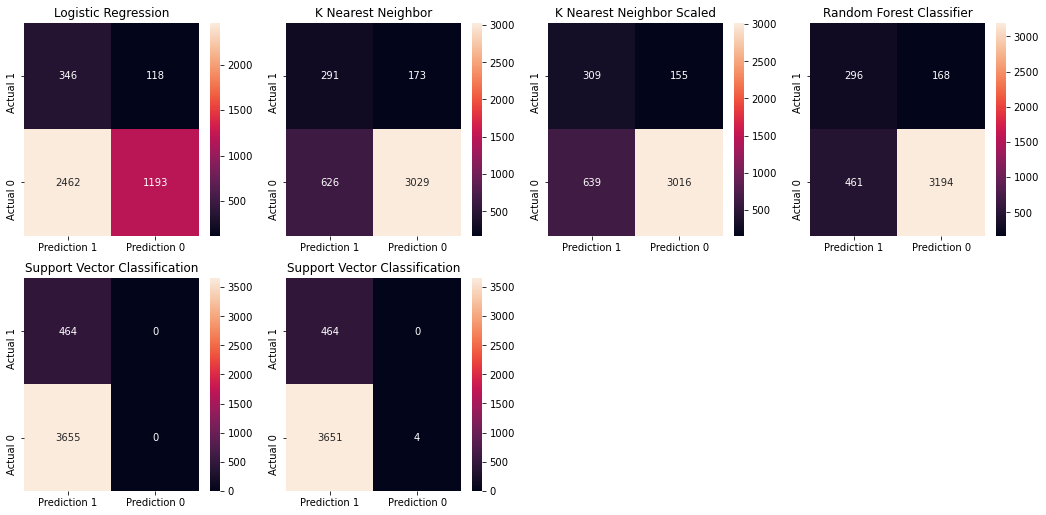

In [37]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True, fmt='d')
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True, fmt='d')
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfKNN2, annot=True, fmt='d')
plt.title('K Nearest Neighbor Scaled')

plt.subplot(4,4,4)
sns.heatmap(dfRF, annot=True, fmt='d')
plt.title('Random Forest Classifier')

plt.subplot(4,4,5)
sns.heatmap(dfSVC, annot=True, fmt='d')
plt.title('Support Vector Classification')

plt.subplot(4,4,6)
sns.heatmap(dfSVC2, annot=True, fmt='d')
plt.title('Support Vector Classification')

plt.show()

In [38]:
import pickle
import joblib

joblib.dump(model_tuned_1_1, 'ModelBankMarketingLogReg')
joblib.dump(model_tuned_2_1, 'ModelBankMarketingKNN')
joblib.dump(model_tuned_2_1S, 'ModelBankMarketingKNNS')
joblib.dump(model_tuned_3_1, 'ModelBankMarketingRF')
joblib.dump(model_tuned_4_1, 'ModelBankMarketingSVC')
joblib.dump(model_tuned_4_1S, 'ModelBankMarketingSVCS')

['ModelBankMarketingSVCS']